In [1]:
# Uncomment to upgrade packages
# !pip install pandas --user --upgrade --quiet
# !pip install numpy --user --upgrade --quiet
# !pip install scipy --user --upgrade --quiet
# !pip install statsmodels --user --upgrade --quiet
# !pip install seaborn --user --upgrade --quiet
# !pip install scikit-learn --user --upgrade --quiet

%load_ext autoreload

In [2]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
import warnings


InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.precision', 3)
sns.set()
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [3]:
# extra imports
import seaborn as sns
from pandas import read_csv
from sklearn import metrics, tree
import graphviz
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [4]:
#llegir dades
Train_subset = read_csv("X_train.csv", index_col=0, delimiter=';')
Val_subset = read_csv("X_val.csv", index_col=0, delimiter=';')

y_train = read_csv("y_train.csv", index_col=0, delimiter=';')
y_val = read_csv("y_val.csv", index_col=0, delimiter=';')

## Escollir paràmetres

In [5]:
# max_depth=k, min_samples_leaf=p
max_depth = list(range(1,50))
min_samples_leaf = list(range(1,30))

# criterion? Gini
criterion=['entropy', 'gini']


hyperparameters = dict(max_depth=max_depth, min_samples_leaf=min_samples_leaf, criterion=criterion)

### Optimització de hyperparàmetres mitjançant Cross-Validation amb els paràmetres escollits

In [6]:
clf = tree.DecisionTreeClassifier()

clf = GridSearchCV(clf, hyperparameters, cv=4, scoring='recall')

clf=clf.fit(Train_subset, y_train)

train_predictions=clf.predict(Train_subset)

## Resultats de les mètriques

In [7]:
print(clf.best_score_)

0.8223140495867769


In [8]:
result = pd.DataFrame(clf.cv_results_)

## Hyperparàmetres escollits

In [9]:
print(clf.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=12)


In [10]:
print('Best max_depth:', clf.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', clf.best_estimator_.get_params()['min_samples_leaf'])

Best max_depth: 6
Best min_samples_leaf: 12


# Validation fix

In [11]:
# entrenem amb els parametres escollits
best_clf = tree.DecisionTreeClassifier(max_depth=clf.best_estimator_.get_params()['max_depth'],
                                       min_samples_leaf=clf.best_estimator_.get_params()['min_samples_leaf'])
best_clf.fit(Train_subset, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=12)

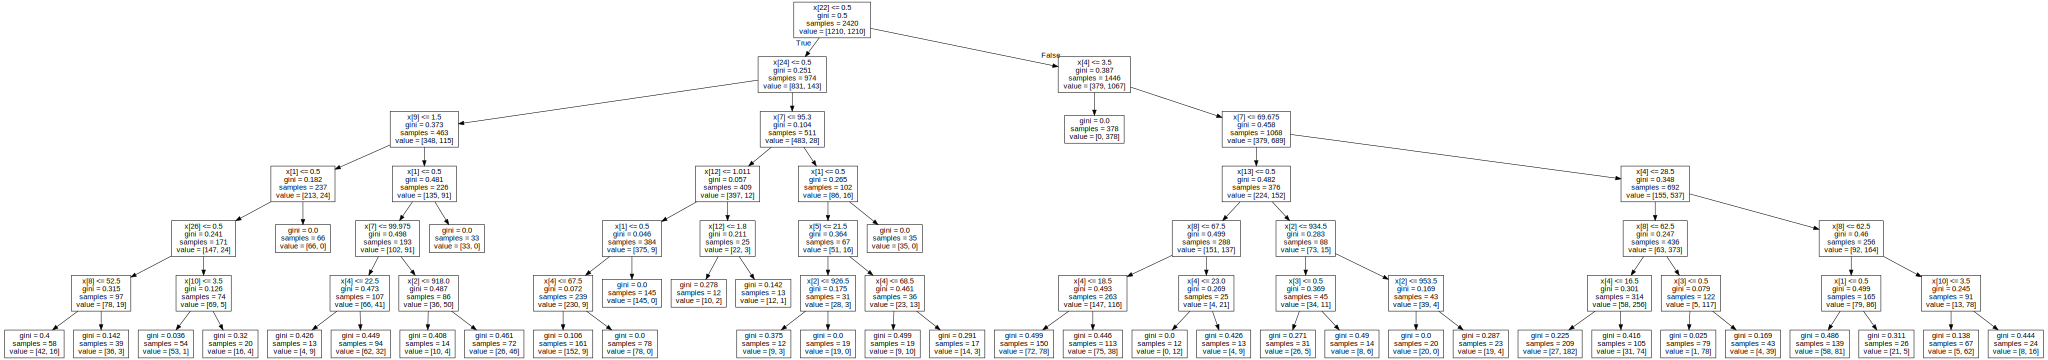

In [12]:
dot_data = tree.export_graphviz(best_clf, out_file=None) 
graph = graphviz.Source(dot_data)
graph

In [13]:
Train_subset.iloc[:,22]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2415    1.0
2416    0.0
2417    0.0
2418    0.0
2419    1.0
Name: Month-to-Month, Length: 2420, dtype: float64

In [14]:
Train_subset.dtypes

Married                                 int64
Number of Dependents                    int64
Zip Code                                int64
Number of Referrals                     int64
Tenure in Months                        int64
Avg Monthly GB Download               float64
Paperless Billing                       int64
Monthly Charge                        float64
Age_disc                                int64
Total Streaming                         int64
Premium Services                        int64
Refunds                               float64
Average Monthly Extra Data Charges    float64
None                                  float64
Offer A                               float64
Offer B                               float64
Offer C                               float64
Offer D                               float64
Offer E                               float64
Cable                                 float64
DSL                                   float64
Fiber Optic                       

In [15]:
# prediccio i metriques
y_preds  = best_clf.predict(Val_subset)


print(metrics.classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80       330
           1       0.77      0.88      0.82       329

    accuracy                           0.81       659
   macro avg       0.82      0.81      0.81       659
weighted avg       0.82      0.81      0.81       659



In [16]:
metrics.confusion_matrix(y_val, y_preds)

array([[245,  85],
       [ 40, 289]], dtype=int64)

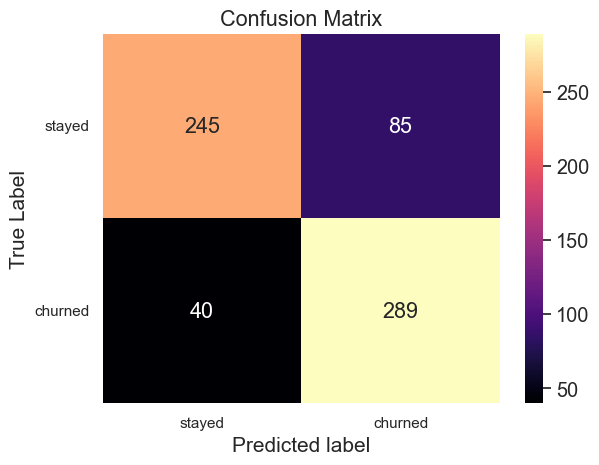

<Figure size 1000x700 with 0 Axes>

In [17]:
matrix = metrics.confusion_matrix(y_val,  
                                            y_preds)#turn this into a dataframe

labels = ['stayed', 'churned']  
matrix_df = pd.DataFrame(matrix)#plot the result
ax = plt.axes()
_ = sns.set(font_scale=1.3)
_ = plt.figure(figsize=(10,7))
_ = sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")#set axis titles
_ = ax.set_title('Confusion Matrix')
_ = ax.set_xlabel("Predicted label", fontsize =15)
_ = ax.set_xticklabels(labels)
_ = ax.set_ylabel("True Label", fontsize=15)
_ = ax.set_yticklabels(labels, rotation = 0)
_ = plt.show()